In [1]:
%matplotlib inline

In [2]:
from brian2 import *

# set_device('cpp_standalone', directory='CUBA')

defaultclock.dt=0.1*ms 

taum = 20*ms
taue = 5*ms
taui = 10*ms
Vt = -50*mV
Vr = -60*mV
El = -49*mV

eqs = '''
dv/dt  = (ge+gi-(v-El))/taum : volt (unless refractory)
dge/dt = -ge/taue : volt (unless refractory)
dgi/dt = -gi/taui : volt (unless refractory)
'''

P = NeuronGroup(4000, eqs, threshold='v>Vt', reset='v = Vr', method='euler')
P.v = 'Vr + rand() * (Vt - Vr)'
P.ge = 0*mV
P.gi = 0*mV

we = (60*0.27/10)*mV # excitatory synaptic weight (voltage)
wi = (-20*4.5/10)*mV # inhibitory synaptic weight
Ce = Synapses(P, P, on_pre='ge += we')
Ci = Synapses(P, P, on_pre='gi += wi')
Ce.connect('i<3200', p=0.02)
Ci.connect('i>=3200', p=0.02)

s_mon = SpikeMonitor(P)

import time

tt = time.time()
run(1 * second)
elapsed = time.time() - tt
print elapsed

WARNING    Model equations use the "unless refractory" flag but no refractory keyword was given. [brian2.groups.neurongroup.no_refractory]


2.04365897179


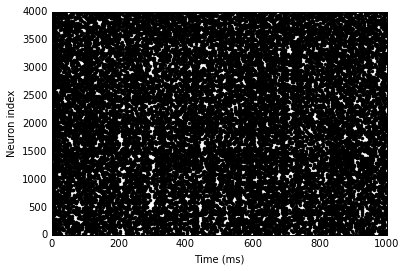

In [3]:
%matplotlib inline  
plot(s_mon.t/ms, s_mon.i, '.k')
xlabel('Time (ms)')
ylabel('Neuron index')